In [28]:
import pandas as pd
from data import constants
from mathutil import comp, percentage, analyze
from plotutil import stackedbar
from mathutil.analyze import groupBy
import numpy as np
from plotutil import periodictable

In [54]:
df = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining\Results.xlsx")
df.fillna("", inplace=True)
cr_bro = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining - Chromyl\Results.xlsx")
df = pd.concat([df, cr_bro])
df["Group"] = df["Group"].astype(str)
dataset = df.loc[(df["Type"] == "Corrphycene")]# &(df["Class"] != "Corrole")]

In [55]:
dataset["AxialLigand"] = dataset.apply(
    lambda x:
    "Py2" if x["AxialLigand"] == "(Py)2"
    else x["AxialLigand"]
    ,axis = 1
)
dataset["D"] = dataset.apply(
    lambda x: 
    "3d" if x["Metal"] in periodictable.m3d
    else "4d" if x["Metal"] in periodictable.m4d
    else "5d" if x["Metal"] in periodictable.m5d
    else "-"
    ,axis=1
)
# dataset = df.loc[(df["Type"] !=  "Porphyrin")]
dataset.reset_index(drop=True, inplace=True)
dataset = percentage.createPercData(dataset)
dataset = comp.createCompData(dataset)
dataset = percentage.createCompPercData(dataset)
dataset = comp.createSumData(dataset)
dataset = percentage.createSumPercData(dataset)
dataset["dominant"] = dataset[constants.compColumns].idxmax(axis=1)
len(dataset)

C:\Users\jenso\AppData\Local\Temp/ipykernel_36676/2027584640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["AxialLigand"] = dataset.apply(
C:\Users\jenso\AppData\Local\Temp/ipykernel_36676/2027584640.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["D"] = dataset.apply(
c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\percentage.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

24

In [31]:
from matplotlib import pyplot as plt
from plotutil.misc import cm_to_inch
import matplotlib
! pip install SciencePlots
! pip install natsort
from natsort import index_natsorted

In [32]:
plt.style.use(['science', 'nature', 'no-latex'])
plt.rcParams["figure.figsize"] = (cm_to_inch(16), cm_to_inch(13))
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["axes.titlesize"] = 9
plt.rcParams["xtick.labelsize"] = 9
plt.rcParams["ytick.labelsize"] = 9
plt.rcParams["font.family"] = "Arial"

In [33]:
dataset.columns

Index(['Unnamed: 0', 'CCDC', 'Class', 'Ligand', 'Metal', 'Group',
       'AxialLigand', 'CoordNo', 'SubstNo', 'CoSolv', 'Id', 'Type', 'DoopExp',
       'DoopSim', 'Doming1', 'Saddling1', 'Ruffling1', 'WavingX1', 'WavingY1',
       'Propellering1', 'Doming2', 'Saddling2', 'Ruffling2', 'WavingX2',
       'WavingY2', 'Propellering2', 'Cavity', 'MetalToN4', 'MetalToMean', 'D',
       'Doming1%', 'Saddling1%', 'Ruffling1%', 'WavingX1%', 'WavingY1%',
       'Propellering1%', 'Doming2%', 'Saddling2%', 'Ruffling2%', 'WavingX2%',
       'WavingY2%', 'Propellering2%', 'Doming comp', 'Saddling comp',
       'Ruffling comp', 'WavingX comp', 'WavingY comp', 'Propellering comp',
       'Doming comp%', 'Saddling comp%', 'Ruffling comp%', 'WavingX comp%',
       'WavingY comp%', 'Propellering comp%', 'Doming summed',
       'Saddling summed', 'Ruffling summed', 'WavingX summed',
       'WavingY summed', 'Propellering summed', 'Doming summed%',
       'Saddling summed%', 'Ruffling summed%', 'WavingX su

C:\Users\jenso\AppData\Local\Temp/ipykernel_36676/2988921703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Metal"] = dataset.apply(lambda x:


(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, ylabel='$\\mathregular{D_{oop}}$ /Å'>)

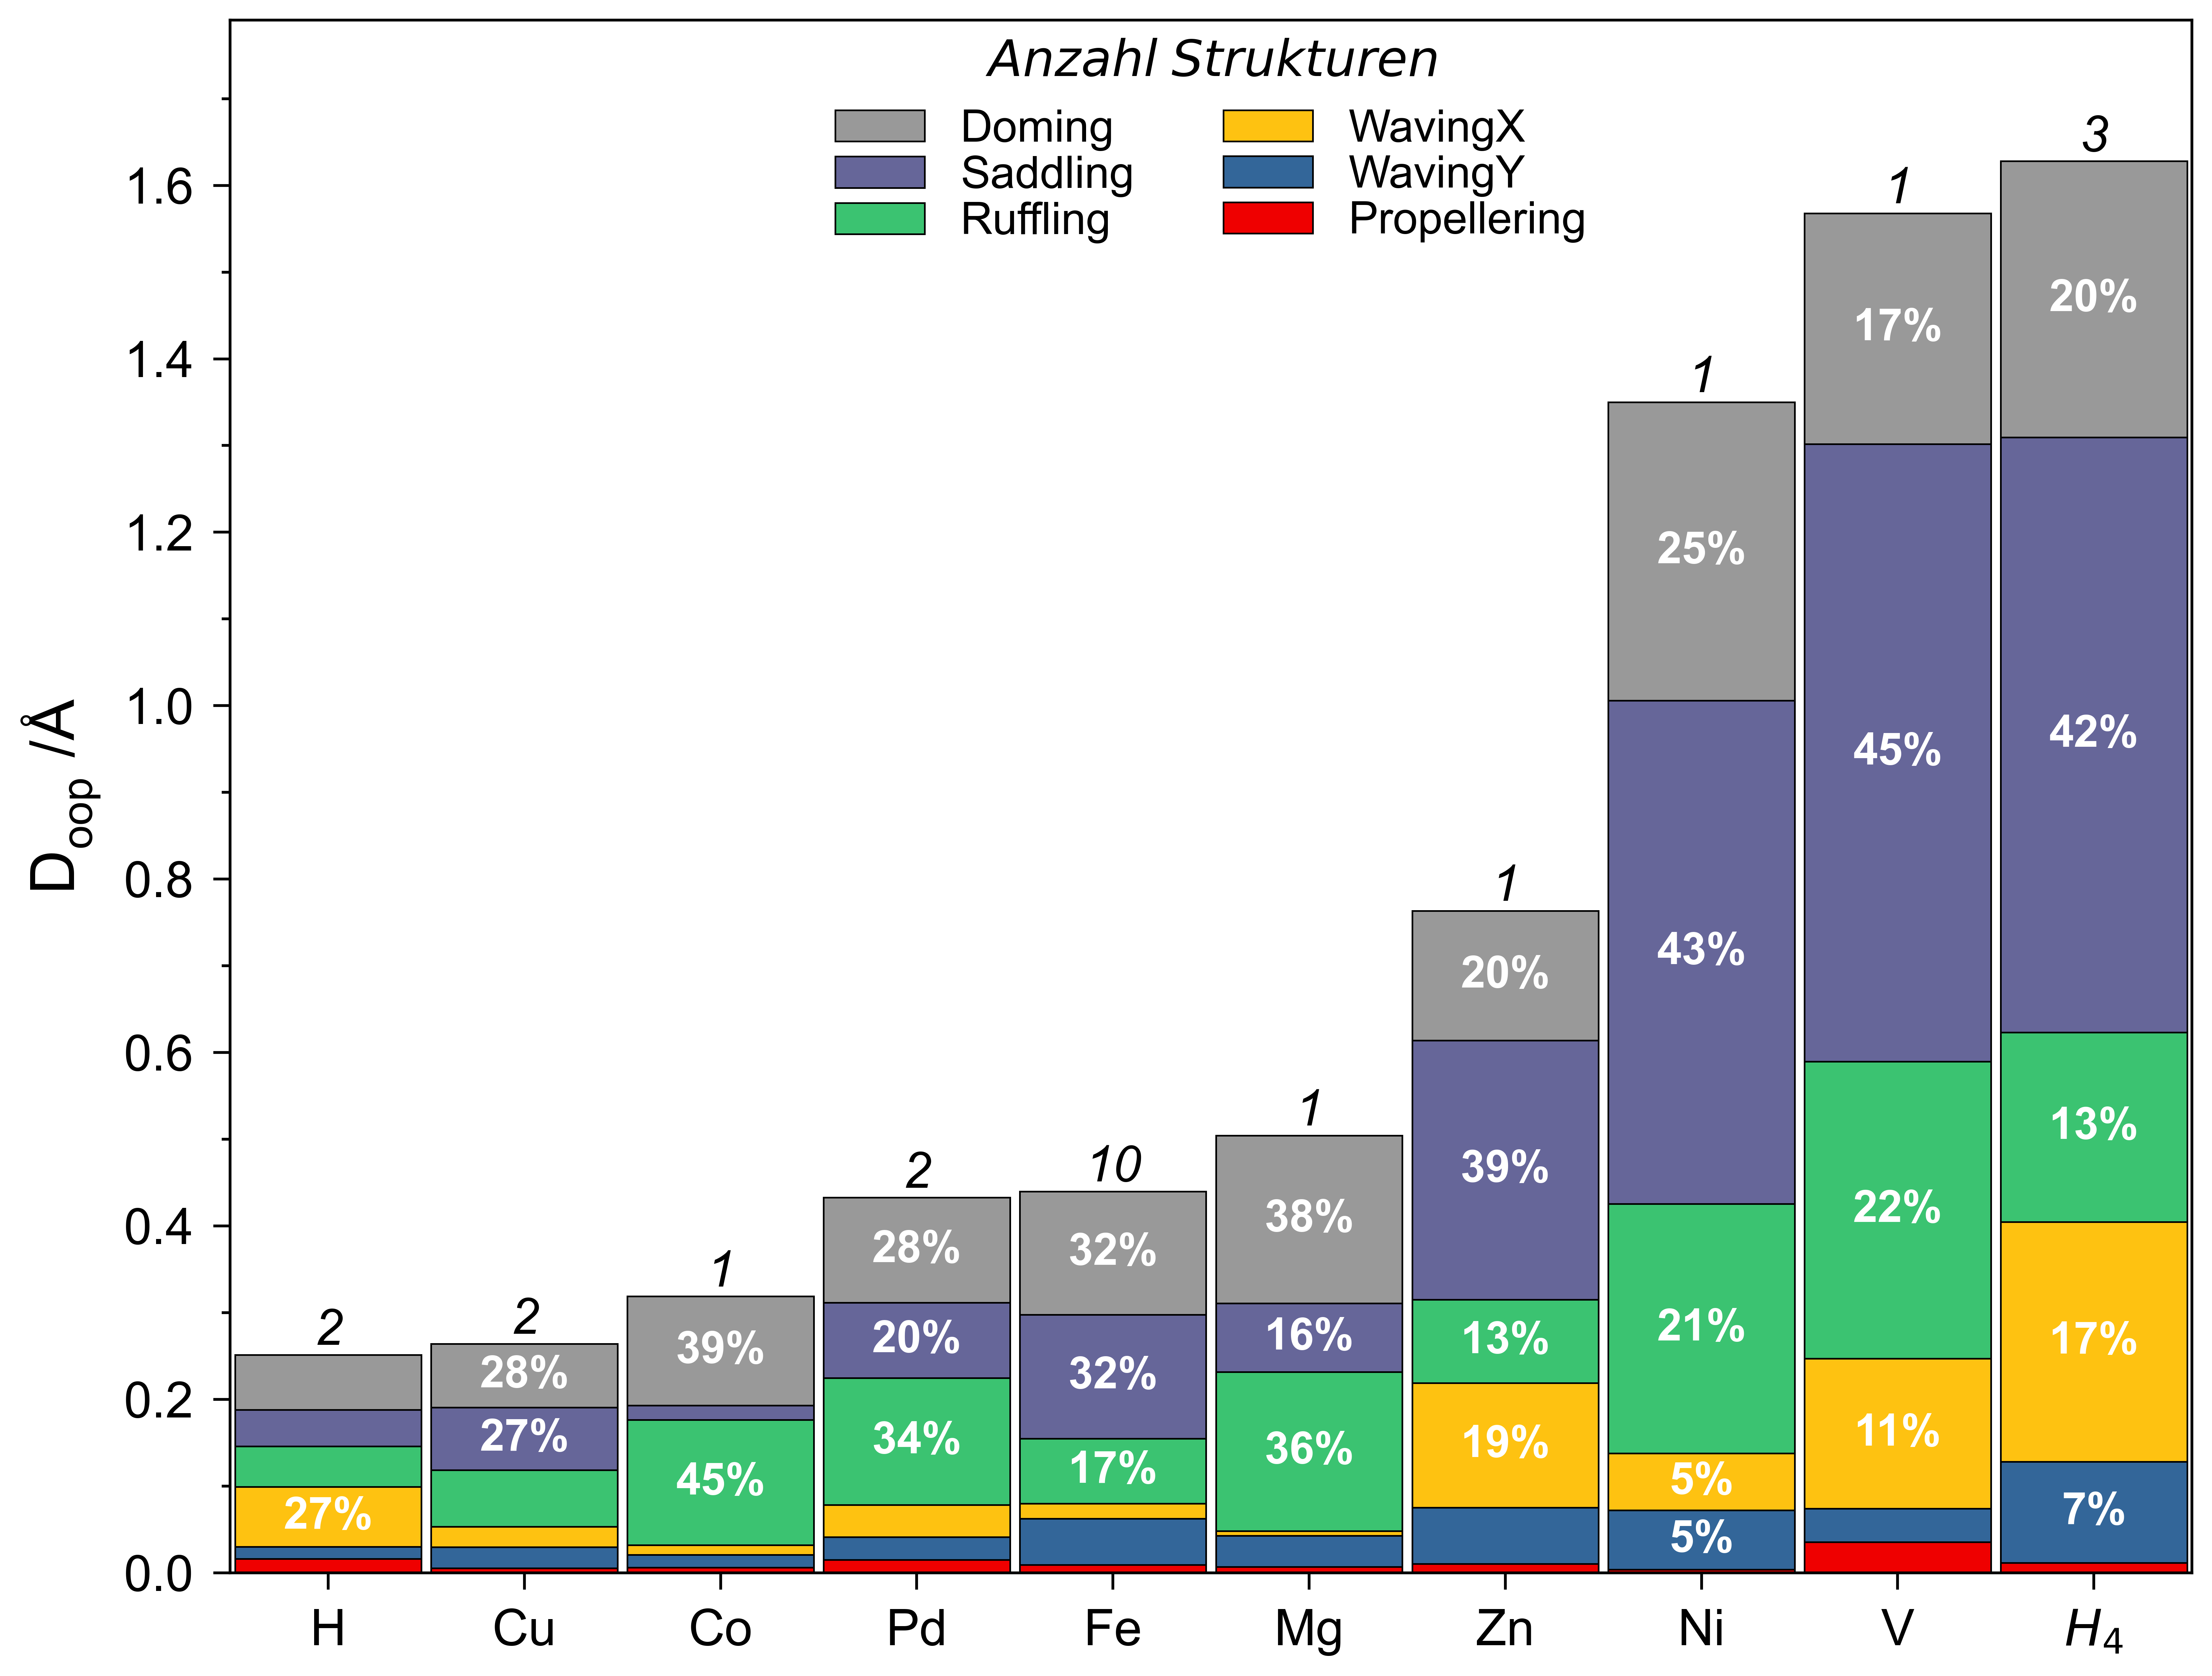

In [59]:
# dataset = dataset.loc[(dataset["SubstNo"] == 8)]# & (dataset["Metal"] == "Ni")]
dataset["Metal"] = dataset.apply(lambda x:
    "$H_4$" if x["Ligand"].endswith("(2+)")
    else x["Metal"]
,axis=1)
by = "Metal"
tm = ["3","4","5","6","7","8","9","10","11","12"]
group = groupBy(dataset, constants.percCompColumns, by)
# group = groupBy(dataset, constants.percColumns, by)
group.sort_index(key=lambda x: np.argsort(index_natsorted(group.index)), inplace=True)
# group = group.loc[(group.index >= 4) & (group.index <=6)]
group.sort_values("DoopExp", inplace=True)
stackedbar.plot(group, "", constants.compColumns, print_legend=True, ncol=2)#, tickRotation=-15)
#stackedbar.plot(group, constants.x_axis_labels[by], constants.analysisColumns, print_legend=True, ncol=2)

(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, ylabel='$\\mathregular{D_{oop}}$ /Å'>)

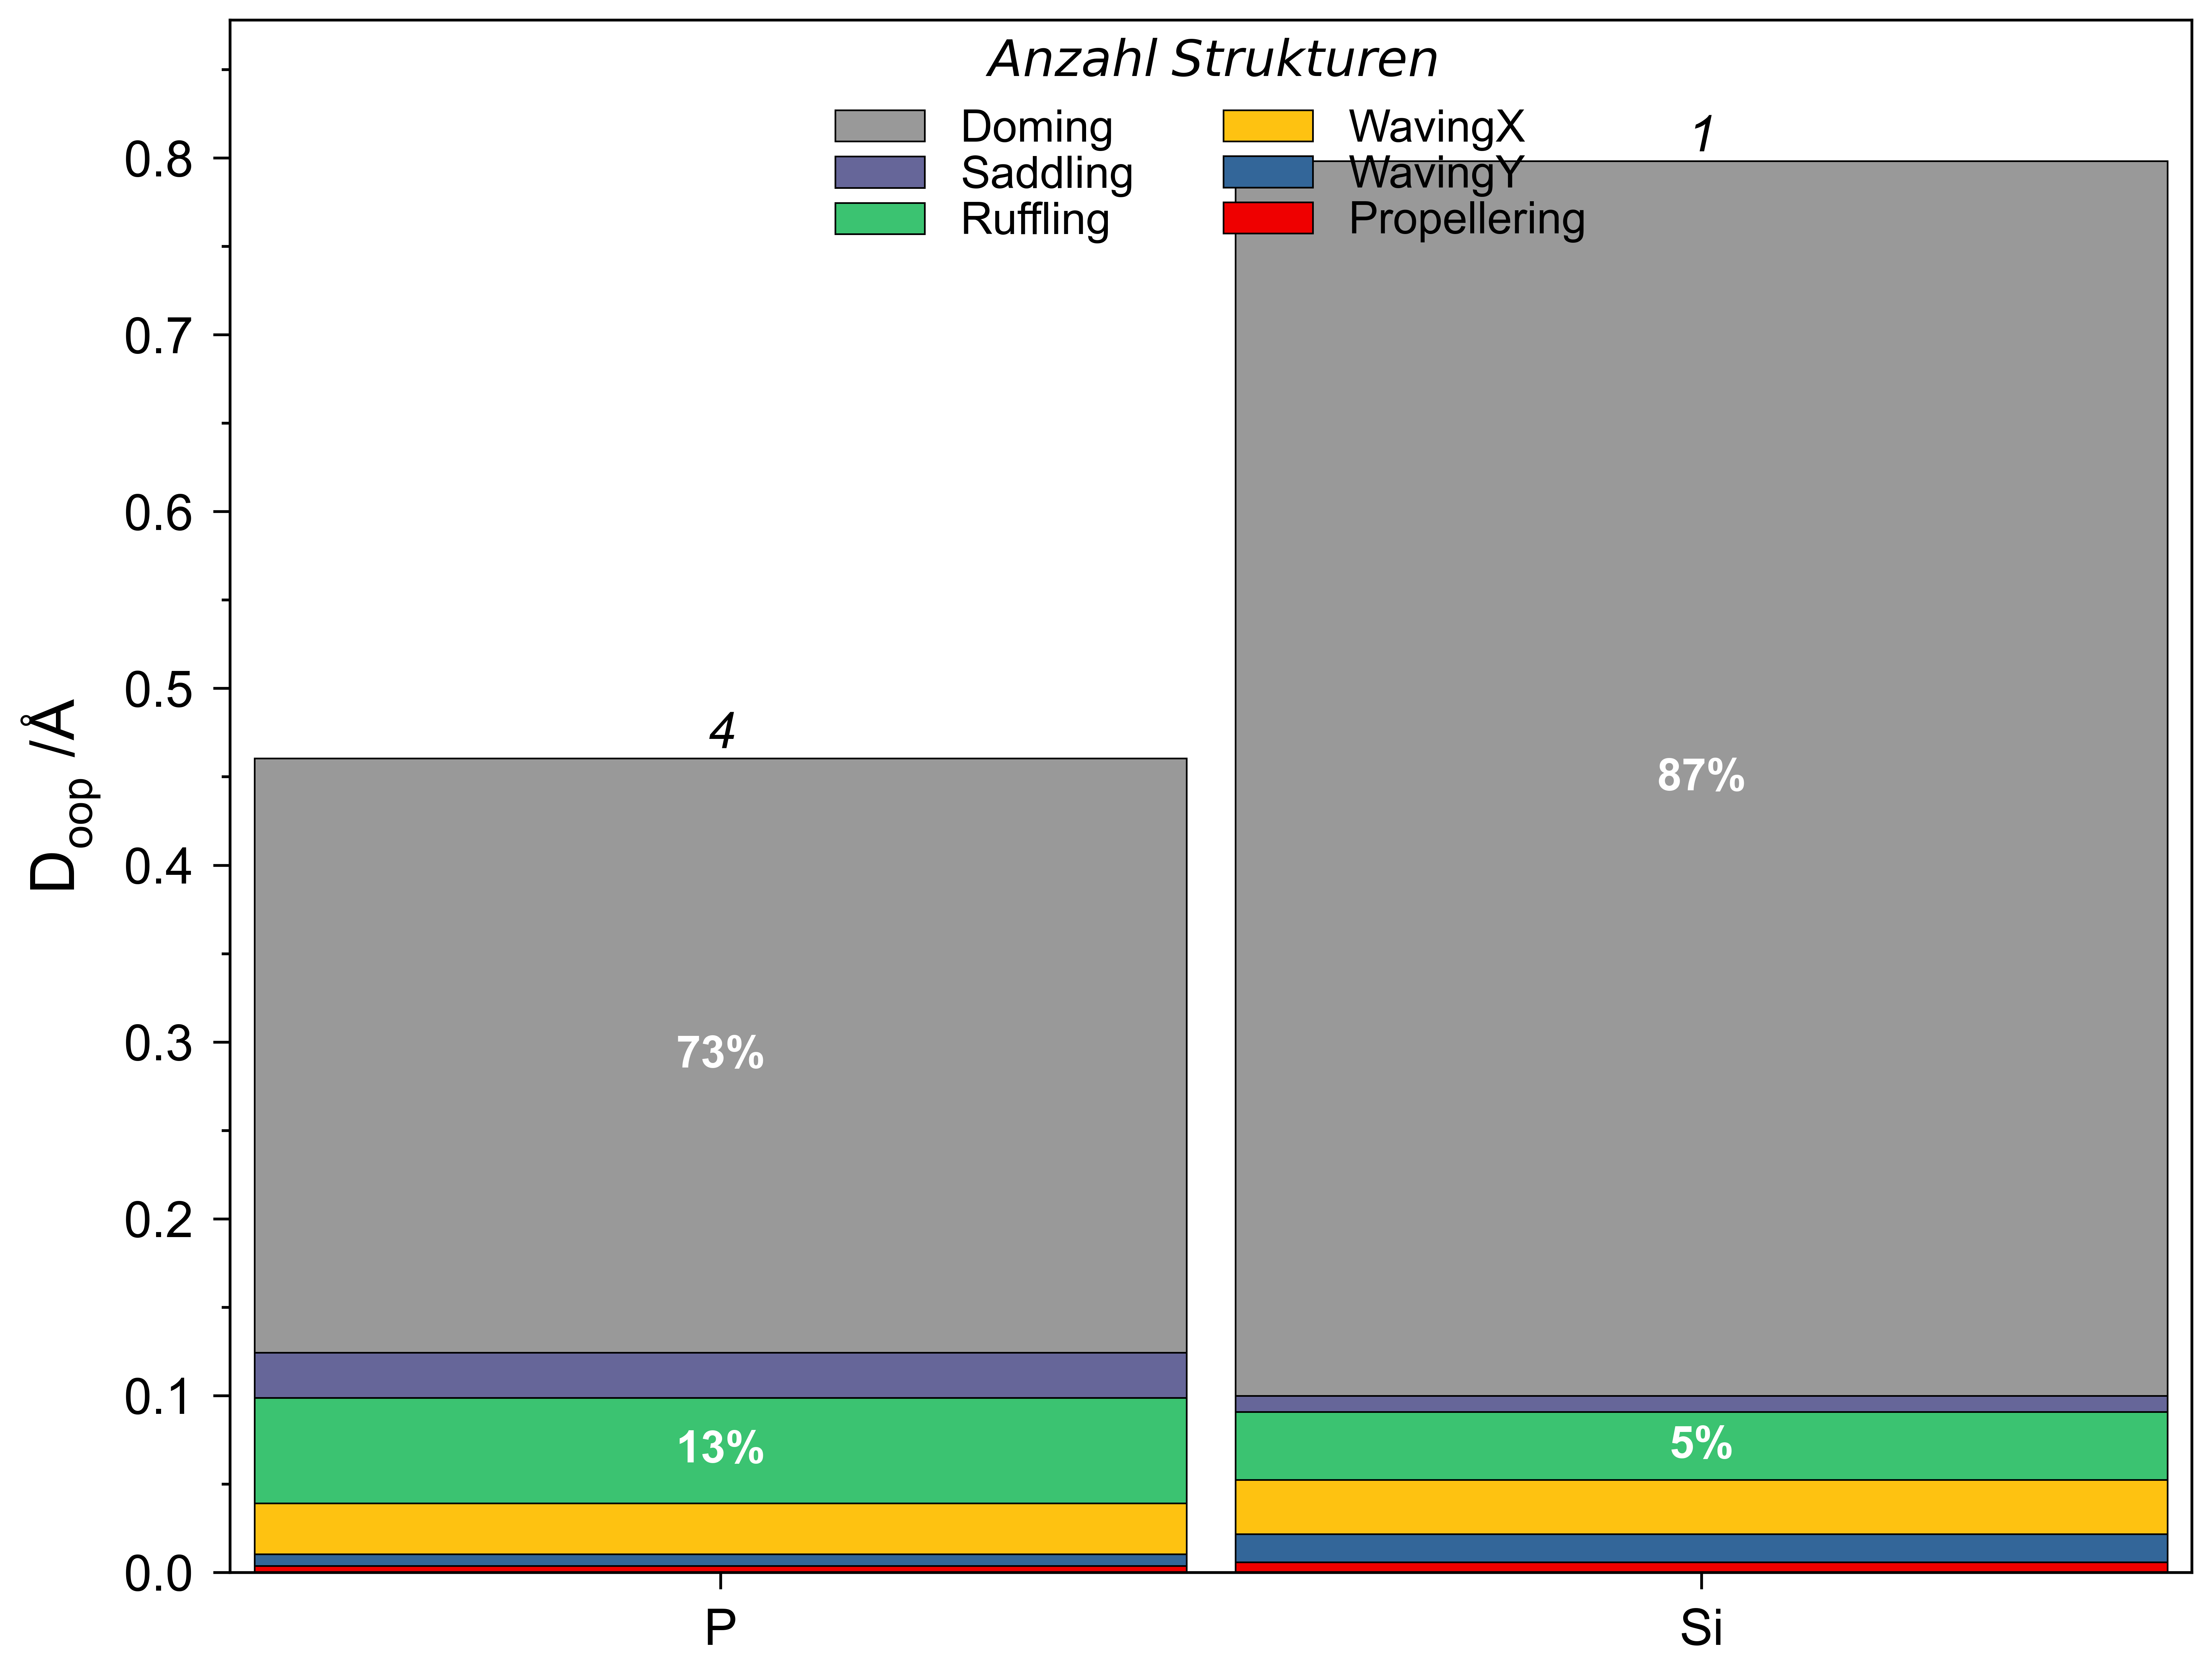

In [8]:
by = "Metal"
metals = [ "Al", "Ga", "In", "Tl", "Si", "Ge", "Sn", "Pb", "P", "As", "Sb", "Bi"]
metals = [  "Ga", "In", "Tl", "Si", "Ge", "Sn", "Pb", "P", "As", "Sb", ]
maingroups = dataset.loc[dataset["Metal"].isin(metals)]
group = groupBy(maingroups, constants.percCompColumns, by)
# group = groupBy(dataset, constants.percColumns, by)
group.sort_index(key=lambda x: np.argsort(index_natsorted(group.index)), inplace=True)
# group = group.loc[(group.index >= 4) & (group.index <=6)]
stackedbar.plot(group, constants.x_axis_labels[by], constants.compColumns, print_legend=True, ncol=2)
#stackedbar.plot(group, constants.x_axis_labels[by], constants.analysisColumns, print_legend=True, ncol=2)

C:\Users\jenso\AppData\Local\Temp/ipykernel_36676/1793048471.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tm["D"] = tm.apply(
C:\Users\jenso\AppData\Local\Temp/ipykernel_36676/1793048471.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tm["CoordNo_"] = tm.apply(


(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, xlabel='Koordinationszahl', ylabel='$\\mathregular{D_{oop}}$ /Å'>)

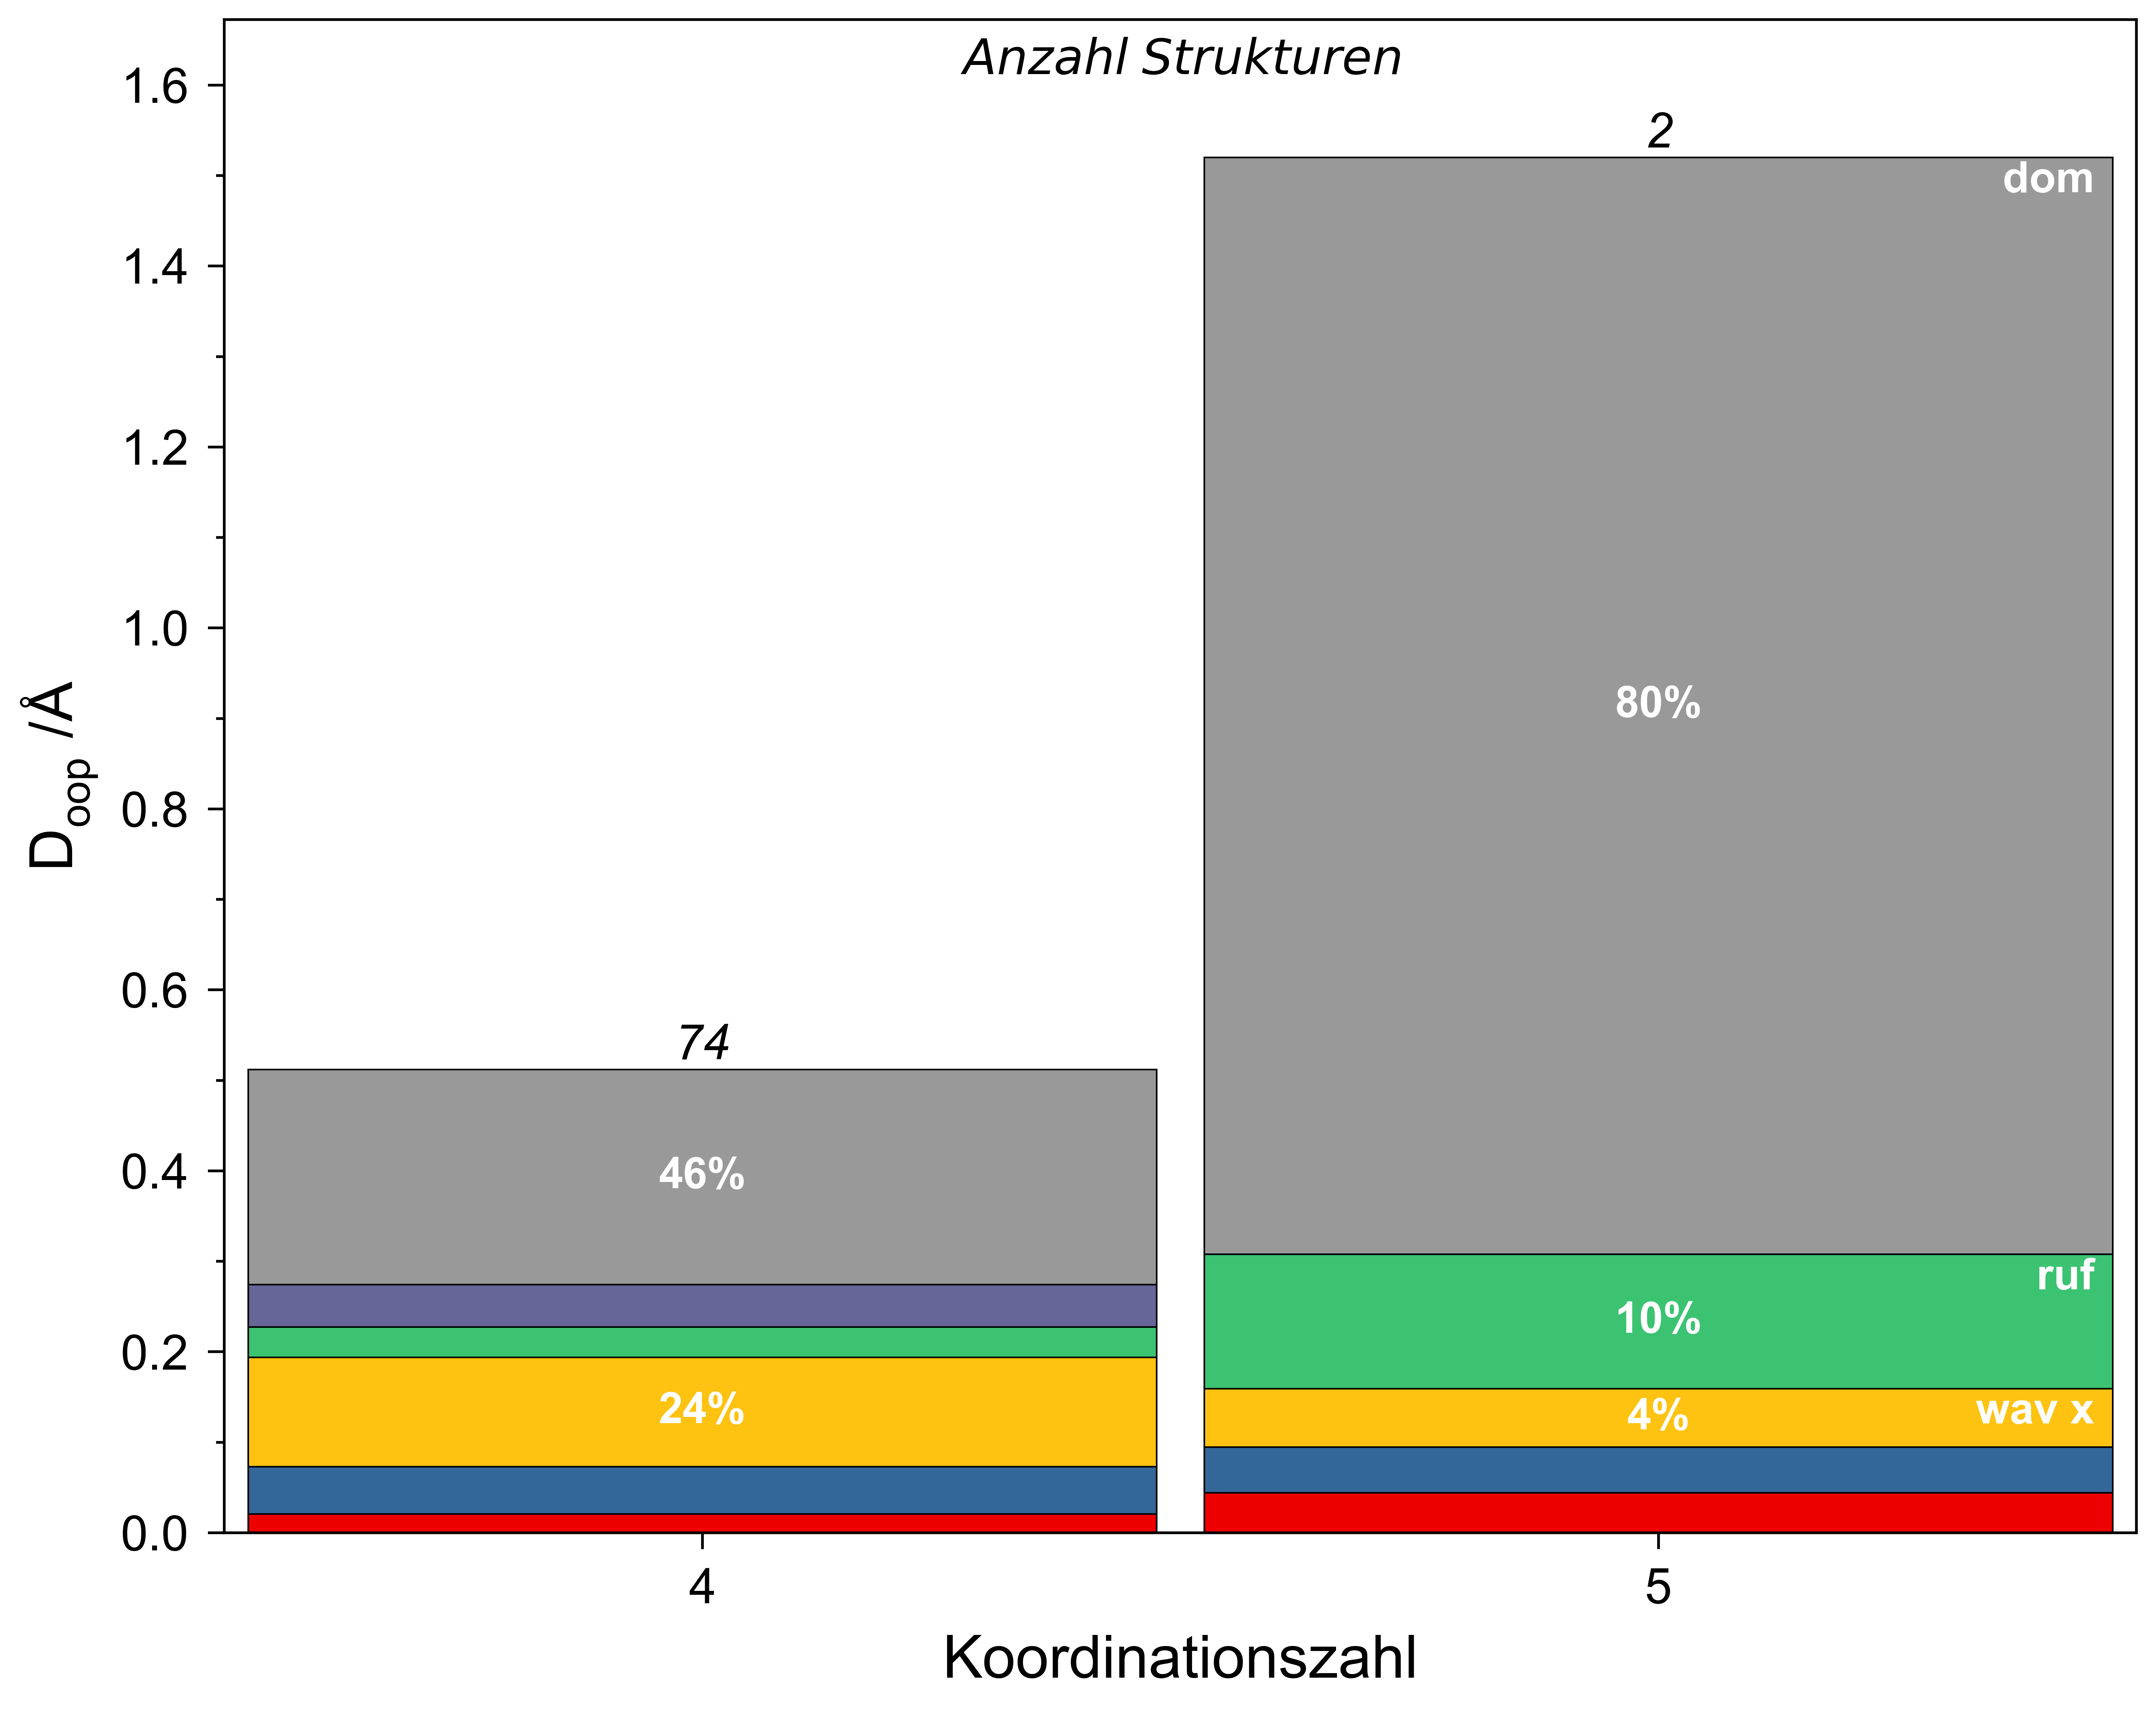

In [9]:
by = "CoordNo_"
m3d = periodictable.m3d.copy()
m4d = periodictable.m4d.copy()
m5d = periodictable.m5d.copy()
tm = dataset.loc[dataset["Metal"].isin(m3d+m4d+m5d)]
# tm = tm.loc[tm["Group"] != "11"]
tm["D"] = tm.apply(
    lambda x:
        "3d" if x["Metal"] in m3d
        else "4d" if x["Metal"] in m4d
        else "5d" if x["Metal"] in m5d
        else "",
    axis=1
)
tm["CoordNo_"] = tm.apply(
    lambda x:
        "4" if x["CoordNo"] == 4 and x["Group"] != "11"
        else "4 (Gruppe 11)" if x["CoordNo"] == 4
        else x["CoordNo"] if x["CoordNo"] > 4 and x["CoordNo"] <=6
        else "sonstige",
        axis=1
)

group = groupBy(tm, constants.percCompColumns, by)
# group = groupBy(dataset, constants.percColumns, by)
group.sort_index(key=lambda x: np.argsort(index_natsorted(group.index)), inplace=True)
# group = group.loc[(group.index >= 4) & (group.index <=6)]
stackedbar.plot(group, constants.x_axis_labels[by], constants.compColumns, print_legend=False, ncol=2)
#stackedbar.plot(group, constants.x_axis_labels[by], constants.analysisColumns, print_legend=True, ncol=2)

In [10]:
by="CCDC"
le_group = ["Zn"]#, "Ag", "Au"]#["Ni"]#, "Pd", "Pt"]#["Co"]#, "Rh", "Ir"]#["Fe", "Ru", "Os"]
data_group = dataset.loc[dataset["Metal"].isin(le_group)]
# data_group = data_group.loc[data_group["SubstNo"] == 11]
data_group["Rad"] = data_group.apply(lambda x:
    "At-Komplex" if x["Ligand"].endswith("-") or "+" in x["CoSolv"]
    # else "Kation" if x["Ligand"].endswith("+") or "-" in x["CoSolv"]    else "Dimer" if x["Ligand"].endswith("Dimer")
    else "β-annelliert" if "Benzo" in x["Ligand"] or "Pyrazino" in x["Ligand"] 
    else "Oktaalkyl" if x["Ligand"].startswith("TE") or x["Ligand"].startswith("OE") or x["Ligand"].startswith("HM") or x["Ligand"].startswith("HE")
    # else "Verkn. Cβ-meso-Aryl" if "Naphto" in x["Ligand"]
    else "Octabromo" if x["Ligand"].startswith("Br8")
    else "Octaiodo" if x["Ligand"].startswith("I8")
    else "Octafluoro" if x["Ligand"].startswith("F8")
    else "Octa-$CF_3$" if x["Ligand"].startswith("(CF3)8")
    else "Octaaryl" if x["Ligand"].startswith("Ph8") or x["Ligand"].startswith("Tol8") or x["Ligand"].startswith("(OMePh)")or x["Ligand"] or x["Ligand"].startswith("(CF3Ph)8") or x["Ligand"].startswith("(CF3-Ph)8")
    else "vollsubst." if x["SubstNo"] == 11
    else "andere", axis=1)
# data_group["AxialLigand"] = data_group.apply(lambda x:
#     "$(NH_3)_2$" if x["AxialLigand"] == "(NH3)2"
#     else "$Py_2$" if x["AxialLigand"] == "Py2"
#     else "$OMePy_2$" if x["AxialLigand"] == "OMePy2"
#     else "$PPh_3$" if x["AxialLigand"] == "PPh3"
#     else "$" + x["AxialLigand"] + "$", 
#     axis=1)
# iv = ["Cl", "Me", "Ph", "OH", "F", "Triflate","μ-O"]
# iii = ["H2O", "Py", "Py2", "(Py)2", "MeCN"]
# data_group["Ox"] = data_group.apply(
#     lambda x: 
#     "+III" if x["AxialLigand"] in iii
#     else "+IV" if x["AxialLigand"] in iv 
#     else "NO" if x["AxialLigand"] == "NO"
#     else "+II" 
#     ,axis=1)
# data_group = data_group.loc[data_group["Ox"] == "+IV"]
group = groupBy(data_group, constants.percCompColumns, by)
# group = groupBy(data_group.loc[data_group["Ox"].isin(["+IV"])], constants.percCompColumns, by)
group.sort_values("DoopExp", inplace=True, ascending=True)
# group.sort_index(key=lambda x: np.argsort(index_natsorted(group.index)), inplace=True)
stackedbar.plot(group, "CCDC Code", constants.compColumns, print_legend=False, ncol=2)#, tickRotation=90)

ValueError: Wrong number of items passed 67, placement implies 1

In [ ]:
by="Metal"
# le_group = ["Mn"]#, "Tc", "Re"]
# le_group = ["Zn", "Hg", "Cd"]
le_group = ["Cu", "Ag", "Au"]
data_group = dataset.loc[dataset["Metal"].isin(le_group)]
# data_group = dataset.loc[dataset["Group"] == "Ln"]
group = groupBy(data_group, constants.percColumns, by)
# iv = ["Cl", "OH", "I", "Br", "Ph", "Br-Ph"]
# v = ["O", "N", "NMes"]
# data_group["Ox"] = data_group.apply(
#     lambda x: 
#     "Cl" if x["AxialLigand"] in []#"Cl", "I", "Br", "Br-Ph"]
#     else "+V" if x["AxialLigand"] in v
#     else "+IV" if x["AxialLigand"] in iv 
#     else "+III"
#     ,axis=1)
# ox = ["+III", "+IV","+V", "Cl"]
# group = groupBy(data_group.loc[data_group["Ox"].isin(["+IV"])], constants.percCompColumns, by)
# group.sort_index(key=lambda x: np.argsort(le_group), inplace=True)
# group.sort_values("DoopExp", inplace=True, ascending=True)
# stackedbar.plot(group, "", constants.analysisColumns, print_legend=False, ncol=2)#, tickRotation=90)

c:\Users\jenso\Documents\Projects\porphystruct-scripts\data\datautil.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Subclass"] = dataframe.apply(
C:\Users\jenso\AppData\Local\Temp/ipykernel_18868/1383975106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hic["Error"] = (data_hic["DoopExp"] - data_hic["DoopSim"])/data_hic["DoopExp"] * 100
c:\Users\jenso\Documents\Projects\porphystruct-scripts\data\datautil.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

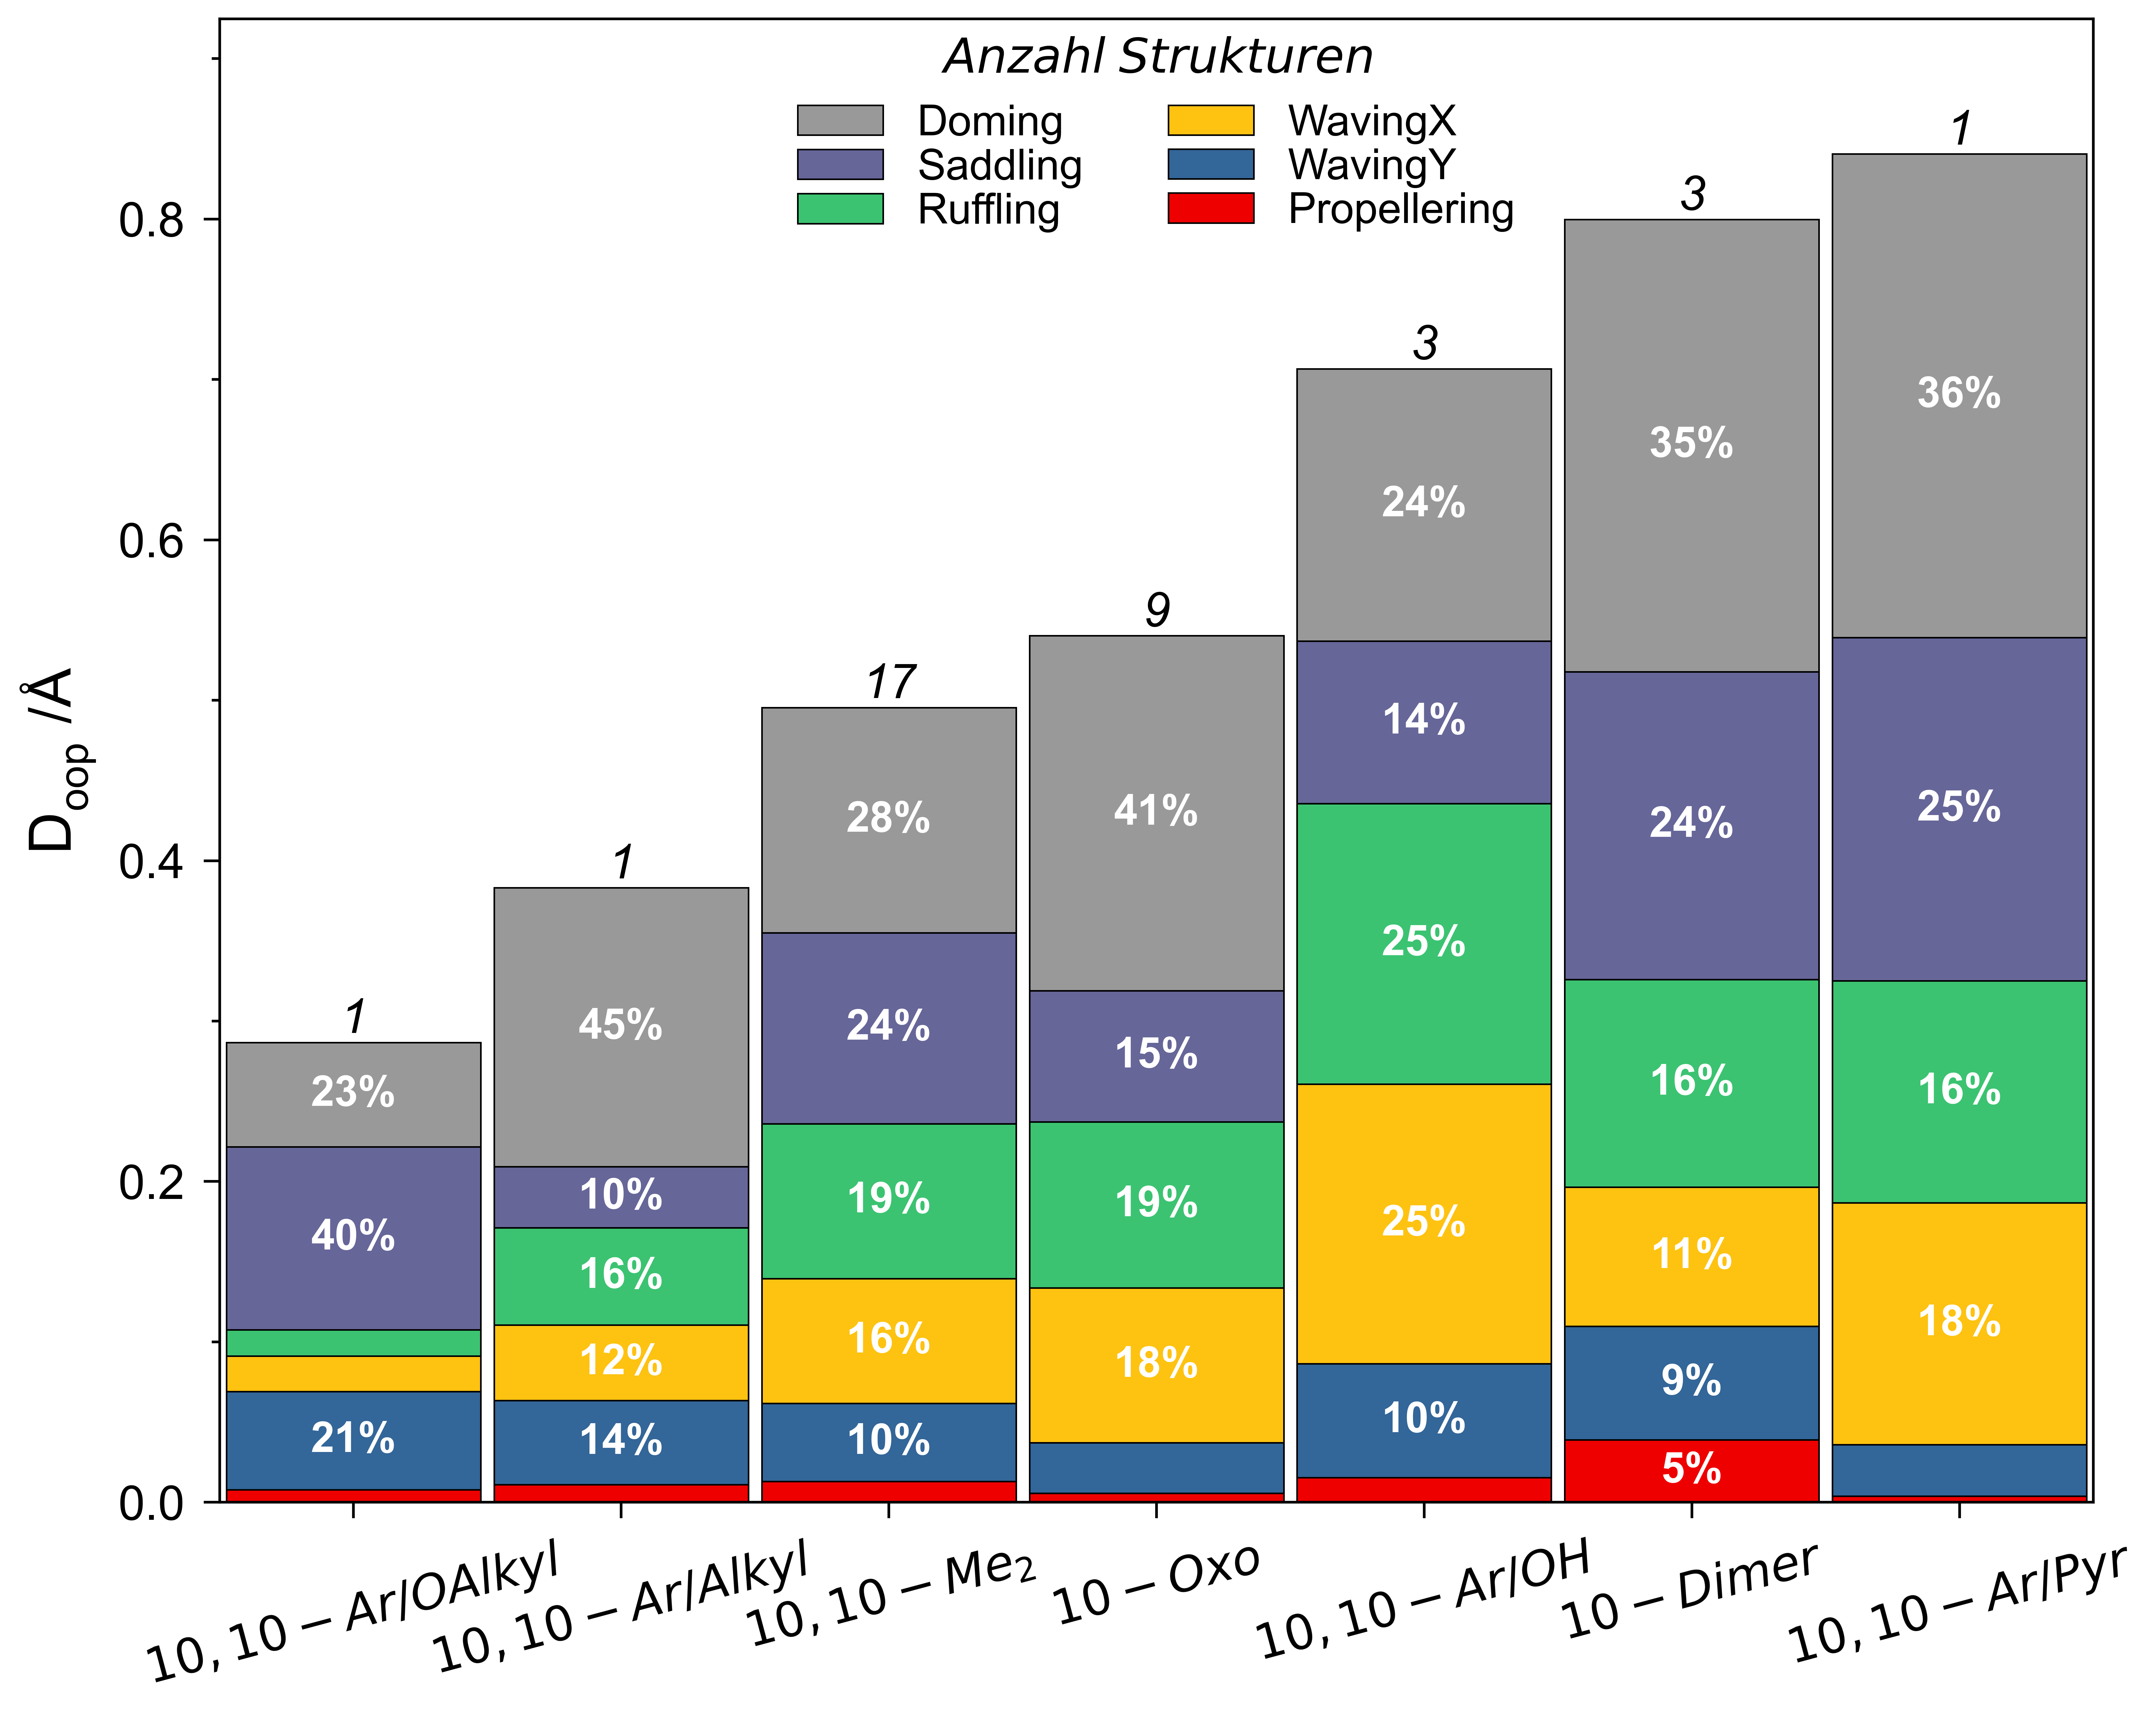

In [ ]:
from data import datautil
data_hic = datautil.applyHICSubclass(dataset)
data_hic["Error"] = (data_hic["DoopExp"] - data_hic["DoopSim"])/data_hic["DoopExp"] * 100
data_hic = datautil.getHeteroAtom(data_hic)
data_hic = datautil.getIsoSubstituent(data_hic)
by = "Iso"
data_hic = data_hic.loc[data_hic["Subclass"] == "10-Isocorrole"]
# data_hic["HeteroM"] = data_hic["Metal"]  + "/" + data_hic["Heteroatom"]
# data_hic = data_hic.loc[~data_hic["Subclass"].isin(["Nope"])]#, "sonstige Isocorrole"])
group = groupBy(data_hic, constants.percCompColumns, by)
group.sort_values("DoopExp", inplace=True, ascending=True)
# group.sort_index(key=lambda x: np.argsort(["N-Heterocorrole", "10-Heterocorrole", "Corrolazine", "5-Isocorrole", "10-Isocorrole", "sonstige Isocorrole"]), inplace=True)

fig, ax = stackedbar.plot(group, "", constants.compColumns, print_legend=True, ncol=2, tickRotation=15)

(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, ylabel='$\\mathregular{D_{oop}}$ /Å'>)

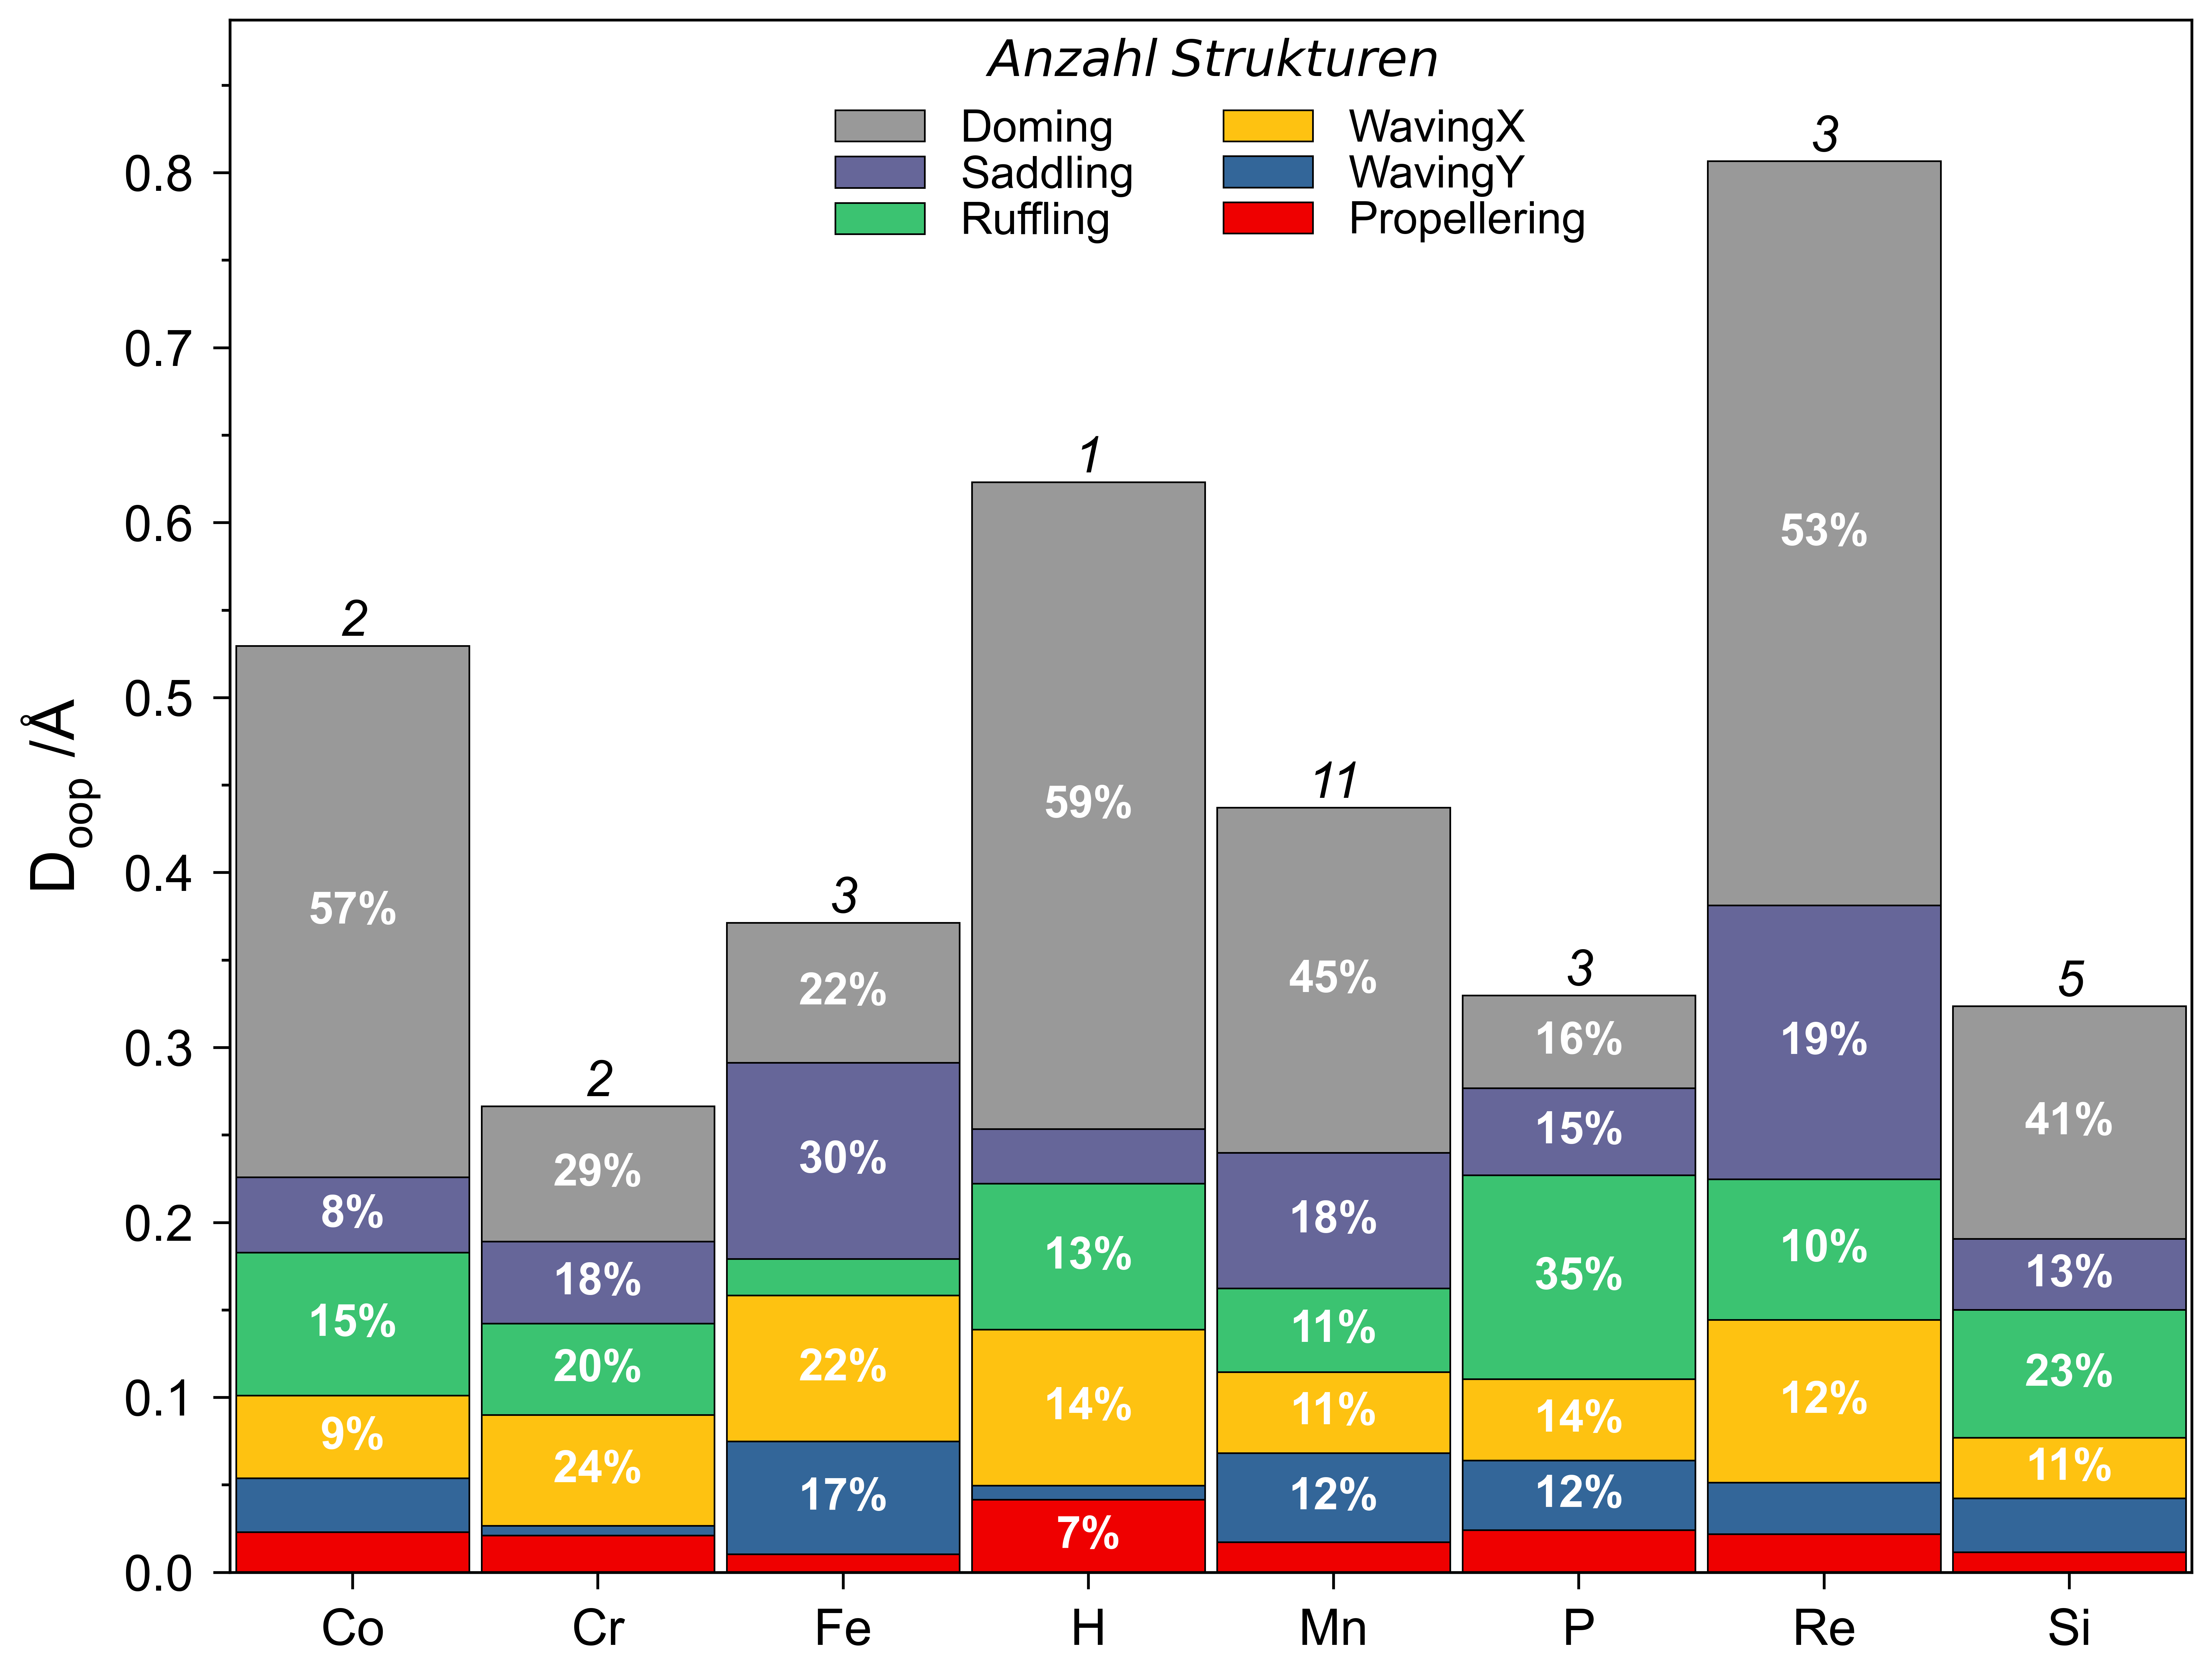

In [ ]:
cn = dataset.loc[dataset["Class"] == "Corrolazine"]
group = groupBy(cn, constants.percCompColumns, "Metal")
stackedbar.plot(group, "", constants.compColumns, print_legend=True, ncol=2)

c:\Users\jenso\Documents\Projects\porphystruct-scripts\data\datautil.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Confusion"] = df.apply(lambda x:
c:\Users\jenso\Documents\Projects\porphystruct-scripts\data\datautil.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NSubst"] = df.apply(lambda x:
C:\Users\jenso\AppData\Local\Temp/ipykernel_18868/3242286682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, ylabel='$\\mathregular{D_{oop}}$ /Å'>)

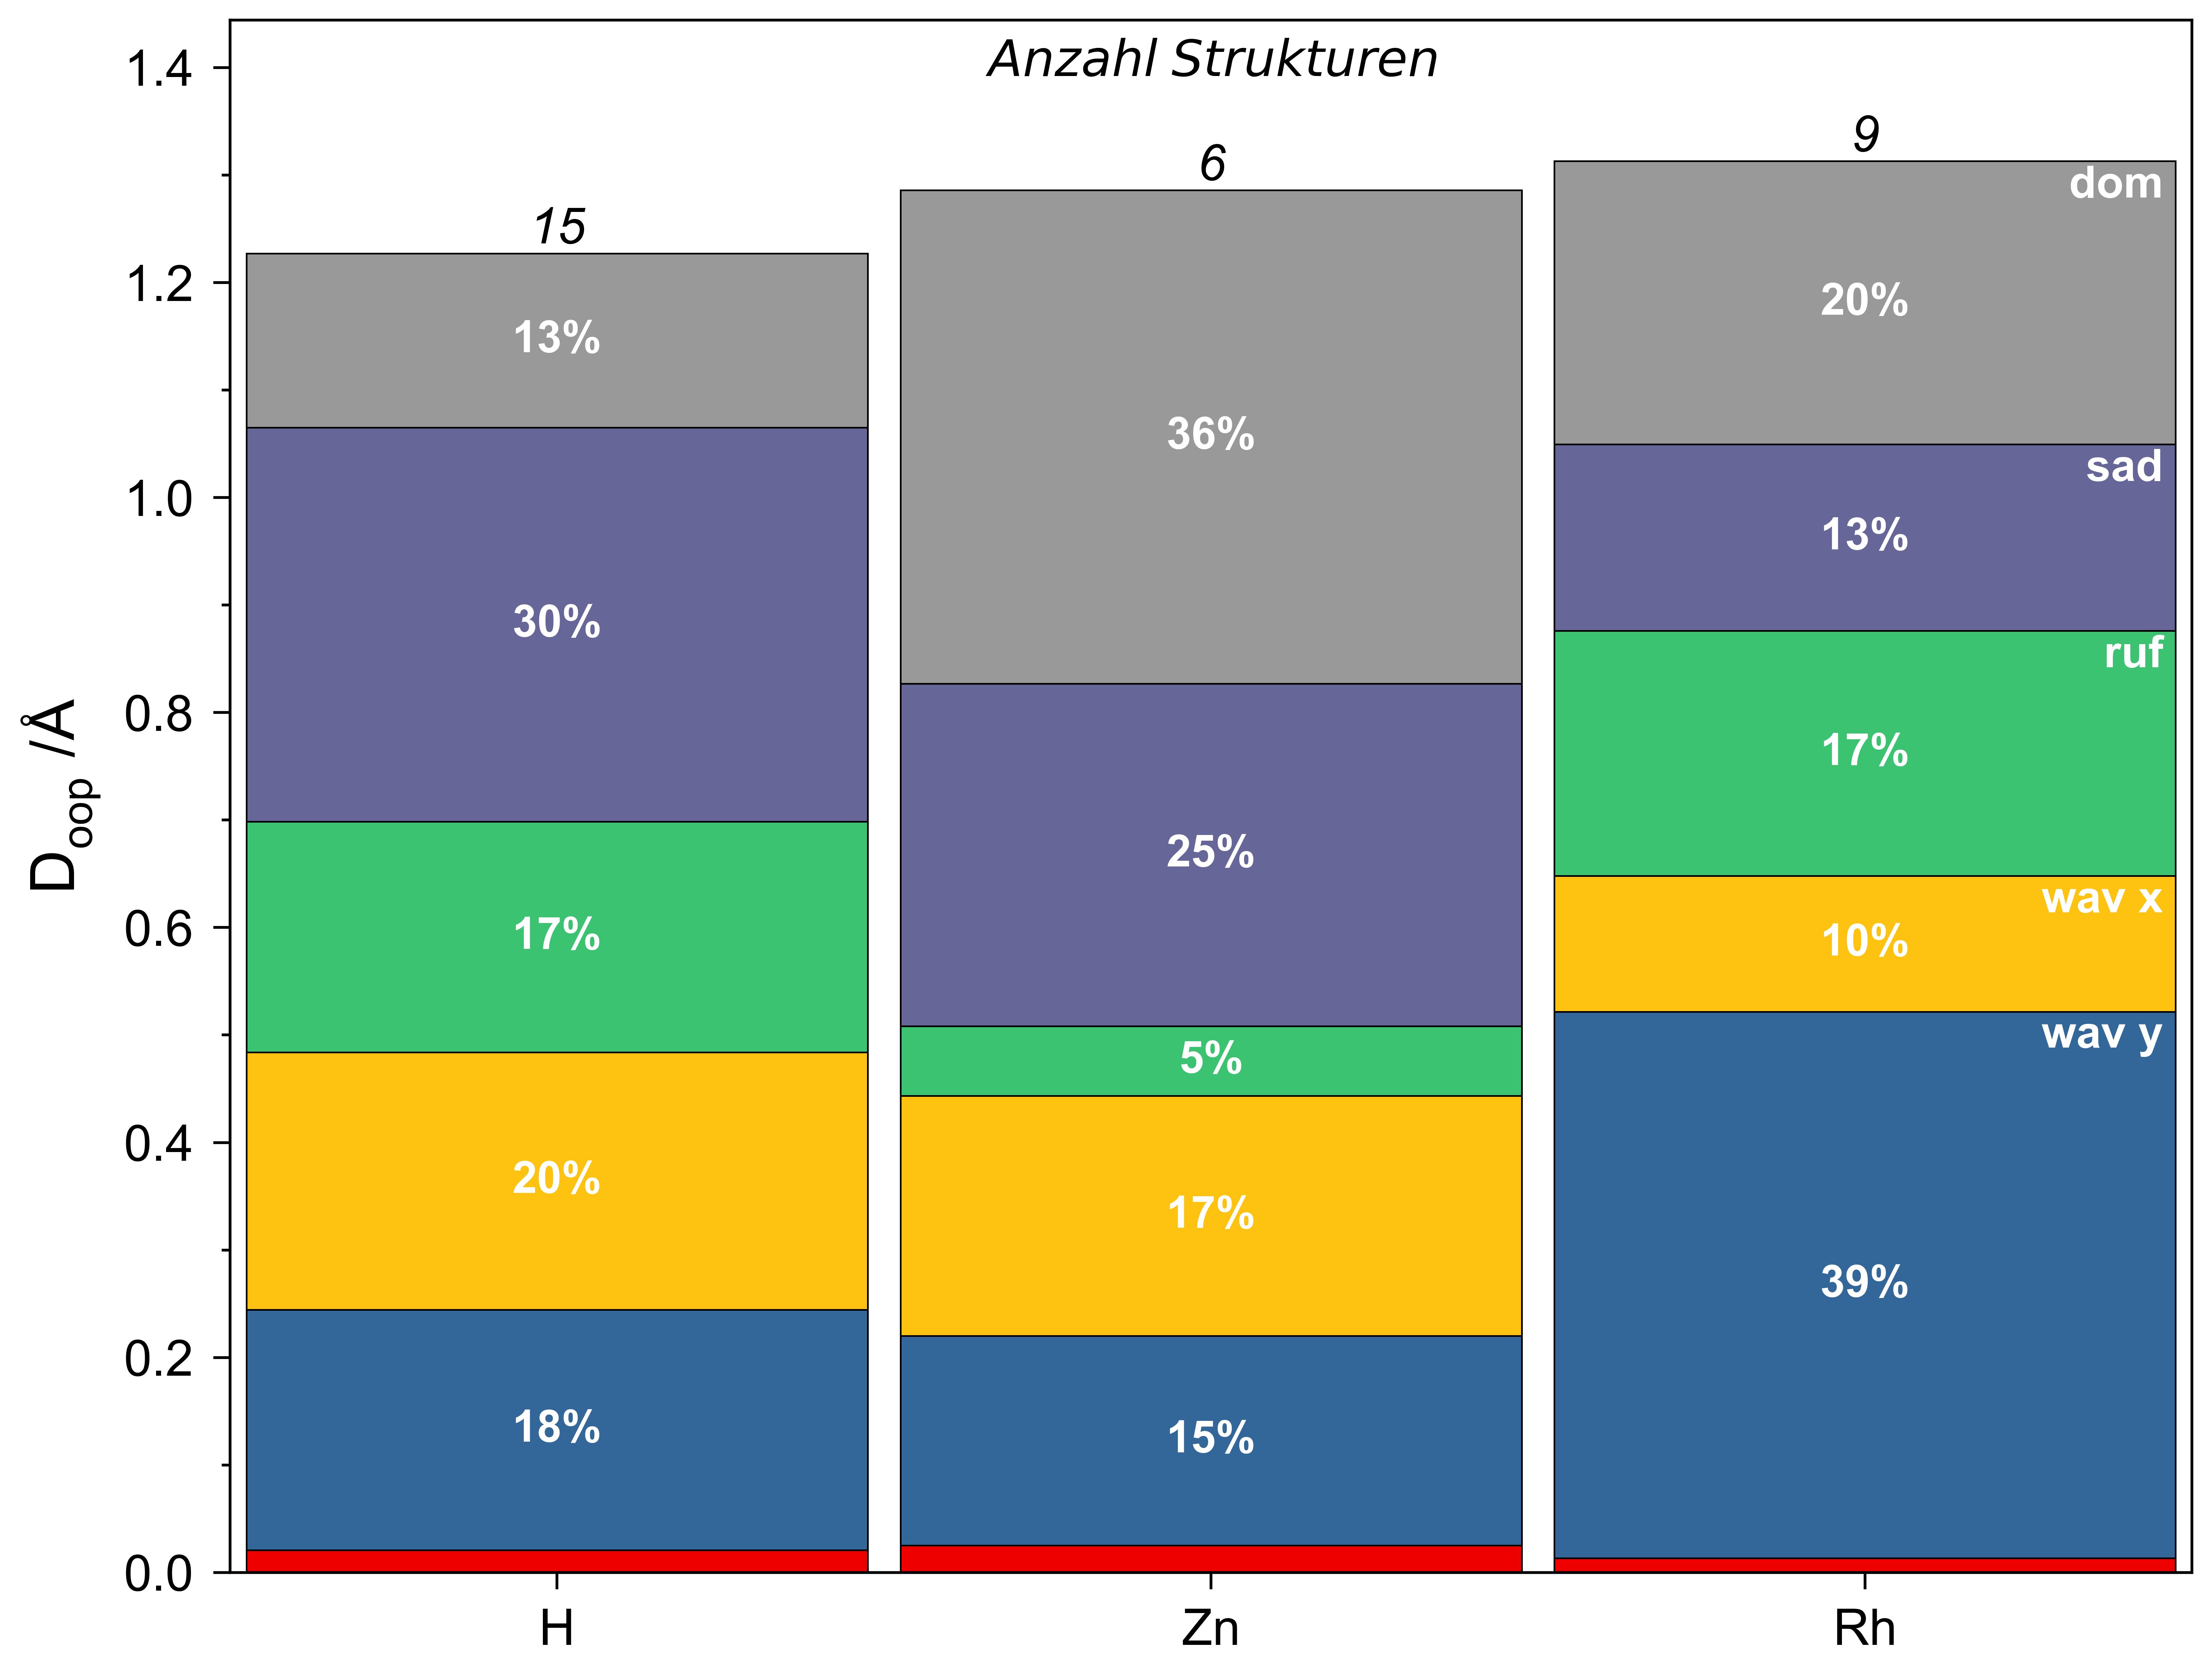

In [ ]:
data_n = dataset.loc[dataset["Class"].isin(["NR-Corrole"])]#["NConfused-Corrole"])]#"NR-Corrole", 
data_n = datautil.getConfusedSubclass(data_n)
data_n = datautil.getNSubst(data_n)
data_n["Special"] = data_n["Confusion"] + data_n["NSubst"]
data_n["Special"] = data_n.apply(
    lambda x:
    "$N_A$,$N_B$-verbrückt" if (x["Special"] == "$N_A$-CO-$N_B$" or x["Special"] == "$N_A$-$CH_2$-$N_B$")
    else "$N_A$,$N_B$-disubst." if x["Special"] == "$N_B$-Me & $N_A$-Me"
    else "$N_A$ substituiert" if (x["Special"].startswith("$N_A"))
    else "$N_B$ substituiert" if x["Special"].startswith("$N_B")
    else x["Special"]
    ,axis=1)
group = groupBy(data_n, constants.percCompColumns, "Metal")

group.sort_values("DoopExp", inplace=True, ascending=True)
stackedbar.plot(group, "", constants.compColumns, print_legend=False, ncol=2)#, tickRotation=15)

c:\Users\jenso\Documents\Projects\porphystruct-scripts\data\datautil.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NSubst"] = df.apply(
c:\Users\jenso\Documents\Projects\porphystruct-scripts\data\datautil.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Subclass"] = df.apply(lambda x:
c:\Users\jenso\Documents\Projects\porphystruct-scripts\data\datautil.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, ylabel='$\\mathregular{D_{oop}}$ /Å'>)

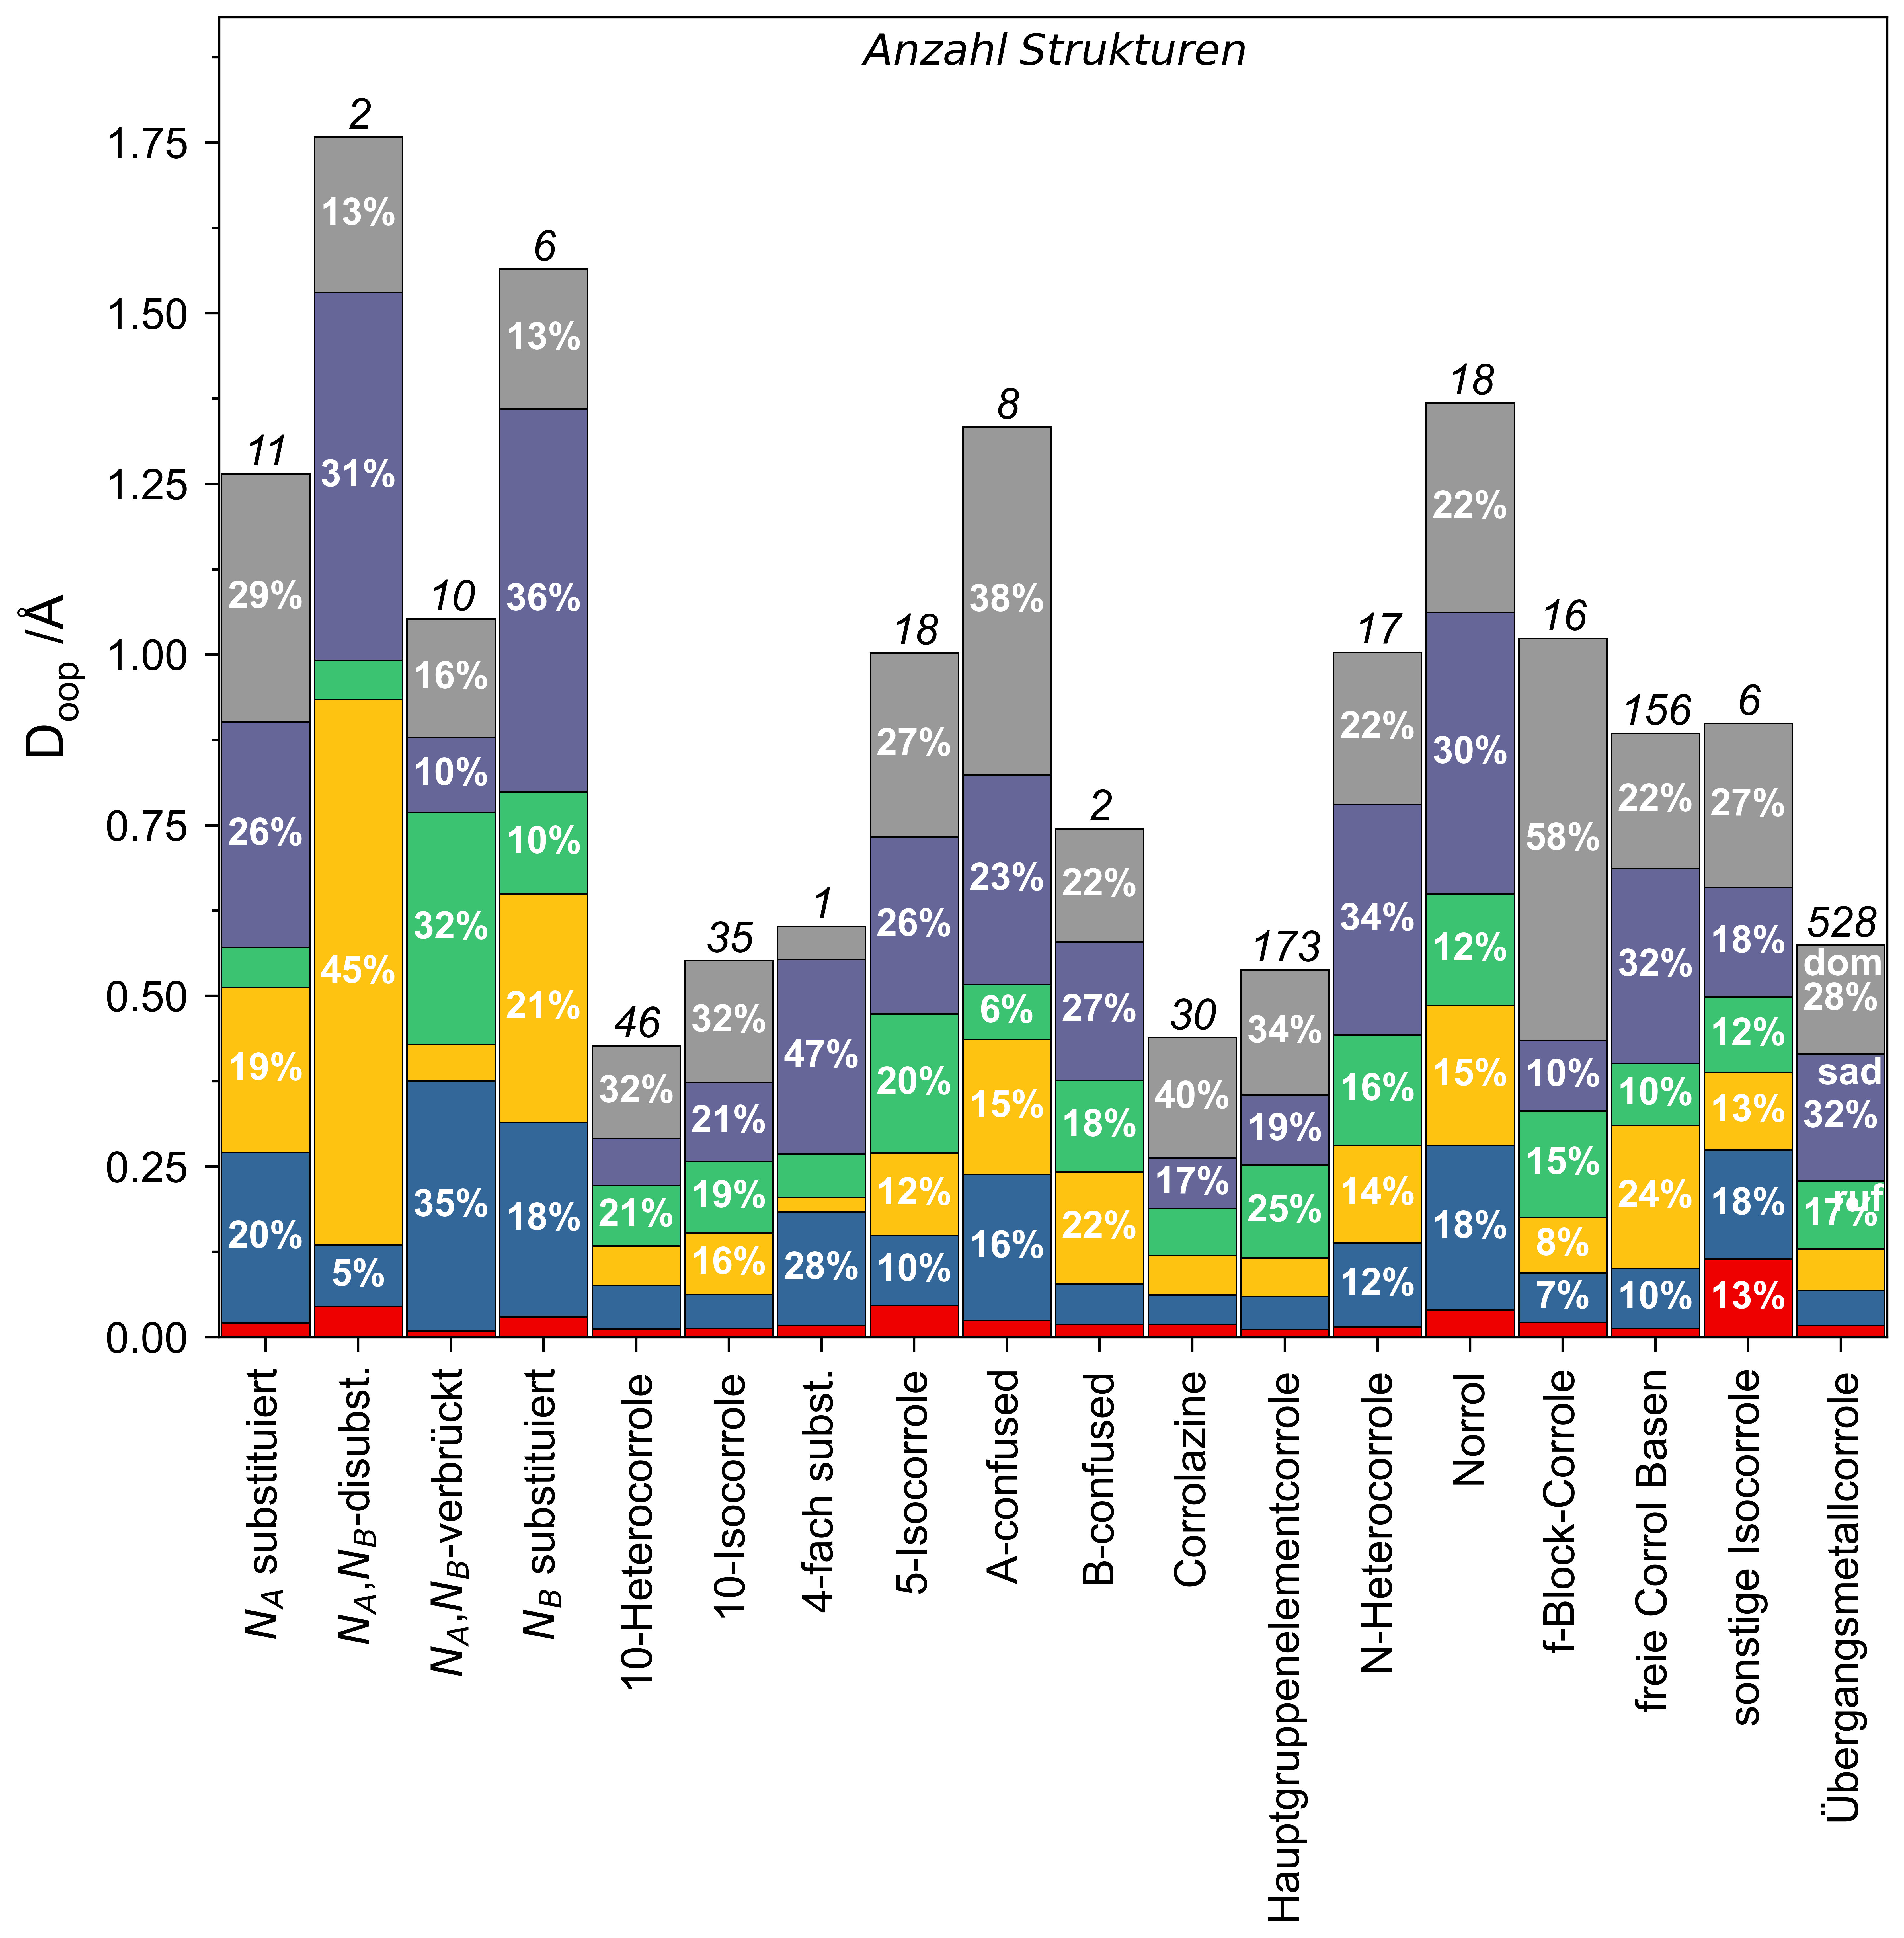

In [ ]:
all = datautil.applyAllSubclasses(dataset)
all_group = groupBy(all, constants.percCompColumns, "Subclass")
stackedbar.plot(all_group, "", constants.compColumns, tickRotation=90)